In [1]:
import pandas as pd
from pathlib import Path
import add_labels_to_fcs
import flowkit as fk
import numpy as np
import random
import matplotlib.pyplot as plt
from add_labels_to_fcs import add_labels

add_labels_to_fcs.hello()

Hello, my flow cytometry loving friends!



In [2]:
#Generate a simulated FCS file.
new_frame = pd.DataFrame()
"""
new_frame[('FSC-A', 'FSC')] = [0,1,2,3,4,5,6,7,8,9]
new_frame[('SSC-A', 'SSC')] = [0,1,2,3,4,5,6,7,8,9]
new_frame[('CD45-A', 'CD45')] = [0,1,2,3,4,5,6,7,8,9]
"""
new_frame['SSC'] = [0,1,2,3,4,5,6,7,8,9]
new_frame['CD45'] = [0,1,2,3,4,5,6,7,8,9]
#add_labels.write_dataframe_as_FCS_file(new_frame, Path('fake.fcs'))
add_labels.write_dataframe_as_FCS_file(new_frame, Path('fake.fcs'))

In [3]:
#Generate fake spreadsheet
new_spreadsheet = pd.DataFrame()
new_spreadsheet['label'] = [0,1,1,0,1,0,1,11,11,0]
new_spreadsheet.to_excel('fake.xlsx', index=False) 

In [4]:
#Test read FCS
df = add_labels.return_FCS_as_compensated_dataframe('fake.fcs')
print(df.shape)
df.head()

(10, 2)


pnn,SSC,CD45
pns,,
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0


In [6]:
ss = add_labels.return_spreadsheet_as_dataframe('fake.xlsx')
ss.head()

.xlsx
Spreadsheet file is xlsx type.



,label
0,0
1,1
2,1
3,0
4,1


In [7]:
grid = add_labels.return_xy_nodes_for_visualization(ss)
grid.head()

,"(label_x-A, label_x)","(label_y-A, label_y)"
0,21969,21900
1,41052,22457
2,40858,24027
3,23068,24054
4,43520,20148


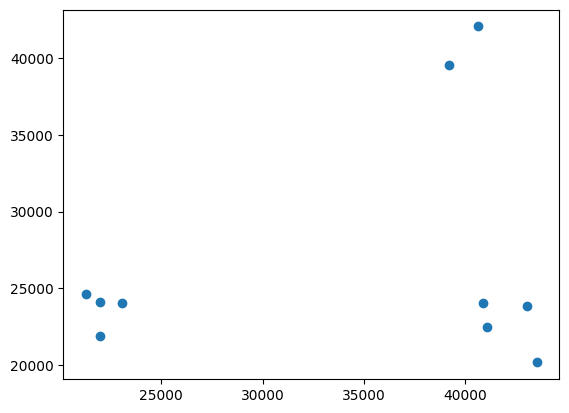

In [8]:
plt.scatter(grid[('label_x-A', 'label_x')], grid[('label_y-A', 'label_y')])

In [9]:
composite_df = add_labels.append_columns_to_compensated_dataframe(df, grid)
composite_df.head()

,SSC,CD45,label_x-A,label_y-A
,,,label_x,label_y
0,0.0,0.0,21969,21900
1,1.0,1.0,41052,22457
2,2.0,2.0,40858,24027
3,3.0,3.0,23068,24054
4,4.0,4.0,43520,20148


In [10]:
add_labels.add_labels_as_grid_to_FCS('fake.fcs', 'fake.xlsx', 'fake with labels as grid.fcs')

.xlsx
Spreadsheet file is xlsx type.



In [11]:
#Test read FCS
df = add_labels.return_FCS_as_compensated_dataframe('fake with labels as grid.fcs')
print(df.shape)
df.head()

(10, 4)


pnn,SSC,CD45,label_x-A,label_y-A
pns,,,label_x,label_y
0,0.0,0.0,20171.0,19994.0
1,1.0,1.0,42864.0,20178.0
2,2.0,2.0,42562.0,23806.0
3,3.0,3.0,21253.0,24315.0
4,4.0,4.0,38110.0,19172.0


In [12]:
def return_labels_for_visualization(dataframe):
    '''
    Take columns of labels and changes the column names to (pnn, pns) format.
    '''
    new_dataframe = pd.DataFrame()
    for column in dataframe.columns:
        new_dataframe[(column + "-A", column)] = dataframe[column]
    return new_dataframe

In [13]:
composite_df = add_labels.append_columns_to_compensated_dataframe(df, add_labels.return_labels_with_fixed_column_names(ss))
print(composite_df.shape)
composite_df.head()

(10, 5)


,SSC,CD45,label_x-A,label_y-A,label-A
,,,label_x,label_y,label
0,0.0,0.0,20171.0,19994.0,0
1,1.0,1.0,42864.0,20178.0,1
2,2.0,2.0,42562.0,23806.0,1
3,3.0,3.0,21253.0,24315.0,0
4,4.0,4.0,38110.0,19172.0,1


In [14]:
add_labels.write_dataframe_as_FCS_file(composite_df, Path('faker.fcs'))